In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Bootstrap aggregation -> Bagging

In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

In [7]:
target = df["Attrition"]
X = df.drop(["Attrition"],axis=1)

In [8]:
target.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=7,stratify=target)

In [10]:
print(X_train.shape)

(1176, 30)


In [11]:
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state=1)

tree_1.fit(X_train,y_train)



DecisionTreeClassifier(random_state=1)

In [12]:
from sklearn.metrics import classification_report
y_pred = tree_1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       247
           1       0.41      0.47      0.44        47

    accuracy                           0.81       294
   macro avg       0.65      0.67      0.66       294
weighted avg       0.82      0.81      0.81       294



In [13]:
y_pred_train = tree_1.predict(X_train)
print("Training Report")
print(classification_report(y_train,y_pred_train))

Training Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [14]:
# Disadvantages: 1. prone to Overfitting 
#                2. generalization is another problem

![](1.png)

![](2.png)

![](3.png)

![](4.png)

In [15]:
# so if we have only one model then there are chances of model to get overfitted so the model is kind of not generalized
# so now the problem is solved if the number of trees are higher then that could be minimized by some other trees and the 
# average/mode will not be manipulated.

![](5.png)

![](6.png)

In [16]:
# so when selecting the number of estimators, we need to be cautious,
# here when we had 1000 observarions, we selected the number of estimators to be 500,
# hence in every tree there are very less chances the variables will get diversified,
# so the model will not be generalised.

In [17]:
from sklearn.metrics import accuracy_score,classification_report

def classification_performance(model,features,target,dataset_name_string):
    print(f'{dataset_name_string} Data Performance')
    print()

    predicted_target = model.predict(features)
    report = pd.DataFrame(classification_report(target,predicted_target,output_dict=True))

    print(report)
    print()
    print("Accuracy Score: ",accuracy_score(target,predicted_target)*100)

In [18]:
from sklearn.model_selection import KFold,cross_val_score

def kfold_cross_validation_score(model,features,target):
    kfold = KFold(n_splits=10)
    result = cross_val_score(model,features,target,cv=kfold,scoring="accuracy")

    print("K-Fold Accuracy Mean: ",round(result.mean()*100,2))
    print("K-Fold Accuracy Standard Deviation: ", round(result.std()*100,2))

In [19]:
classification_performance(tree_1,X_train,y_train,"Training")
classification_performance(tree_1,X_test,y_test,"Testing")

Training Data Performance

               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    986.0  190.0       1.0     1176.0        1176.0

Accuracy Score:  100.0
Testing Data Performance

                    0          1  accuracy   macro avg  weighted avg
precision    0.895833   0.407407  0.806122    0.651620      0.817752
recall       0.870445   0.468085  0.806122    0.669265      0.806122
f1-score     0.882957   0.435644  0.806122    0.659300      0.811448
support    247.000000  47.000000  0.806122  294.000000    294.000000

Accuracy Score:  80.61224489795919


In [20]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier 

# Bagging Classifier and RandomForestClassifier are almost same, the only difference in RandomForestClassifier,
# is it has Variable sampling in it.

In [21]:
bag_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10,random_state=7,oob_score=True)

In [23]:
bag_model = bag_classifier.fit(X_train,y_train)

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:791: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:797: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [24]:
bag_model.oob_score_
# accuracy of the model: estimated by the observations which are not there in our model

0.8239795918367347

In [25]:
classification_performance(bag_model,X_train,y_train,"Training")
classification_performance(bag_model,X_test,y_test,"Testing")

Training Data Performance

                    0           1  accuracy    macro avg  weighted avg
precision    0.980119    1.000000  0.982993     0.990060      0.983331
recall       1.000000    0.894737  0.982993     0.947368      0.982993
f1-score     0.989960    0.944444  0.982993     0.967202      0.982606
support    986.000000  190.000000  0.982993  1176.000000   1176.000000

Accuracy Score:  98.29931972789116
Testing Data Performance

                    0          1  accuracy   macro avg  weighted avg
precision    0.874539   0.565217   0.85034    0.719878      0.825089
recall       0.959514   0.276596   0.85034    0.618055      0.850340
f1-score     0.915058   0.371429   0.85034    0.643243      0.828151
support    247.000000  47.000000   0.85034  294.000000    294.000000

Accuracy Score:  85.03401360544217


In [26]:
# the difference in 10% among accuracy_score of training and testing indicates that the mode is overfitting

In [28]:
kfold_cross_validation_score(bag_classifier,X,target)

c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:791: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:797: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packa

K-Fold Accuracy Mean:  84.63
K-Fold Accuracy Standard Deviation:  1.43


c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:791: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\parth\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:797: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [29]:
# K-Fold Accuracy Mean:  84.63
# K-Fold Accuracy Standard Deviation:  1.43

In [37]:
rf_classifier = RandomForestClassifier(
                                n_estimators=25,
                                criterion='gini',           # the function to measure the quality of split
                                max_depth=10,               # we can generalise the model fit by reducing the level till
                                                            # which it can split the nodes and thus reducing overfitting
                                min_impurity_decrease=0.01, # to avoid over fitting, we can put threshold on how much impurity
                                                            # should decrease on splitting,  for that node to split
                                max_samples=1.0,            # we are using entire original dataset for creating bootstrapped
                                                            # datasets, but we can reduce it with this hyperparameter for more 
                                                            # generalization 
                                max_features=5,             # square root of the number of features allowed in variable sampling
                                oob_score=True,
                                class_weight="balanced",
                                random_state=7
                                )

In [38]:
# random_state must be constant while trying and optimising model with multiple features.
# because, suppose we ran a model and some random sampling occur, and the data got split
# and now we change the random_state then the re-sampling 
# will be totally new and the results we would get would not be as expected.

# so random_state might be some constant multiplier which would do the random sampling.

In [39]:
rf_model = rf_classifier.fit(X_train,y_train)

In [40]:
classification_performance(rf_model,X_train,y_train,"Training")
classification_performance(rf_model,X_test,y_test,"Testing")

Training Data Performance

                    0           1  accuracy    macro avg  weighted avg
precision    0.930260    0.396970  0.780612     0.663615      0.844099
recall       0.798174    0.689474  0.780612     0.743824      0.780612
f1-score     0.859170    0.503846  0.780612     0.681508      0.801762
support    986.000000  190.000000  0.780612  1176.000000   1176.000000

Accuracy Score:  78.06122448979592
Testing Data Performance

                    0          1  accuracy   macro avg  weighted avg
precision    0.907407   0.346154  0.758503    0.626781      0.817683
recall       0.793522   0.574468  0.758503    0.683995      0.758503
f1-score     0.846652   0.432000  0.758503    0.639326      0.780364
support    247.000000  47.000000  0.758503  294.000000    294.000000

Accuracy Score:  75.85034013605441


In [ ]:
# So this is probably the best model as of now and to improve further, we can do hyperparameter tuning

![](7.png)

In [41]:
# two ways for optimization of hyper parameters
# 1. grid search cv -> grid search on top of cross validation
# 2. random search cv -> random search on top of cross validation

![](8.png)

![](9.png)

![](10.png)

In [42]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [43]:
params = {
    "n_estimators" :[25,50,75,100],
    "criterion":["entropy","gini"],
    "max_depth":[5,10,12,15],
    "max_features":[5,6,7,8]
}

In [55]:
grid_model = GridSearchCV(RandomForestClassifier(),param_grid=params,scoring="f1",cv=10,verbose=3,n_jobs=-1)
# verbose = 3 is used for printing the intermediary steps, so it helps in debugging where the model fails maybe
# 0-> prints nothing, 1-> larger notes or something , 3 is widely used.
# n_jobs = -1 -> for parallel processing, so used for parallel processing 
# -1 means using all the cores

In [56]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 12, 15],
                         'max_features': [5, 6, 7, 8],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='f1', verbose=3)

In [57]:
grid_model.best_estimator_

RandomForestClassifier(max_depth=10, max_features=8, n_estimators=25)

In [58]:
print("Best Estimator:",grid_model.best_estimator_)
print("Best Params:",grid_model.best_params_)
print("Best Test Score:",grid_model.best_score_)
print("All scores:",grid_model.cv_results_["mean_test_score"])

Best Estimator: RandomForestClassifier(max_depth=10, max_features=8, n_estimators=25)
Best Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'n_estimators': 25}
Best Test Score: 0.33714979911531634
All scores: [0.15312159 0.18231884 0.17206569 0.15298268 0.22039394 0.17665104
 0.16520986 0.17963674 0.16805702 0.16812629 0.19385225 0.20218991
 0.22392641 0.20919462 0.18657952 0.21933972 0.29744426 0.26421671
 0.27095549 0.25901266 0.24973335 0.27187523 0.268979   0.29656085
 0.30298008 0.27848388 0.2896403  0.2901441  0.28804222 0.32740693
 0.29425183 0.31919479 0.26487703 0.24885233 0.28783655 0.28403863
 0.27796129 0.2845232  0.29449613 0.26920523 0.29073225 0.29567582
 0.29611521 0.26350242 0.29874641 0.27971659 0.3306979  0.30776559
 0.26432413 0.26556577 0.27457986 0.27477504 0.27332821 0.24119747
 0.271076   0.28527806 0.28595356 0.29110497 0.26892979 0.27313464
 0.30251857 0.2685478  0.29132342 0.29020903 0.1574809  0.14490213
 0.1719904  0.18161491 0.2542655  0.1

In [59]:
# somehow the model is not performing better than previously built model individually

In [60]:
rf_classifier_with_gridsearch_CV = RandomForestClassifier(
                                n_estimators=25,
                                criterion='gini',
                                max_depth=10,
                                max_features=8,
                                oob_score=True,
                                bootstrap=True,
                                random_state=7
                                )

In [61]:
rf_classifier_with_gridsearch_CV = rf_classifier_with_gridsearch_CV.fit(X_train,y_train)

In [62]:
classification_performance(rf_classifier_with_gridsearch_CV,X_train,y_train,"Training")

Training Data Performance

                    0           1  accuracy    macro avg  weighted avg
precision    0.978175    1.000000  0.981293     0.989087      0.981701
recall       1.000000    0.884211  0.981293     0.942105      0.981293
f1-score     0.988967    0.938547  0.981293     0.963757      0.980821
support    986.000000  190.000000  0.981293  1176.000000   1176.000000

Accuracy Score:  98.12925170068027


In [63]:
classification_performance(rf_classifier_with_gridsearch_CV,X_test,y_test,"Testing")

Testing Data Performance

                    0          1  accuracy   macro avg  weighted avg
precision    0.868794   0.833333  0.867347    0.851064      0.863125
recall       0.991903   0.212766  0.867347    0.602334      0.867347
f1-score     0.926276   0.338983  0.867347    0.632630      0.832389
support    247.000000  47.000000  0.867347  294.000000    294.000000

Accuracy Score:  86.73469387755102


In [64]:
# our individual model was better

In [65]:
random_model = RandomizedSearchCV(estimator=RandomForestClassifier(),scoring="f1",param_distributions=params,cv=5,verbose=1,n_jobs=-1)

In [67]:
random_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 10, 12, 15],
                                        'max_features': [5, 6, 7, 8],
                                        'n_estimators': [25, 50, 75, 100]},
                   scoring='f1', verbose=1)

In [68]:
random_model.best_estimator_

RandomForestClassifier(max_depth=10, max_features=6)

In [69]:
# for sharing the model and using it in different machines 
# we have concept of pickle

In [70]:
# Pickling a file
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf_model,open(filename,'wb'))

In [71]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test,y_test)
result

0.7585034013605442

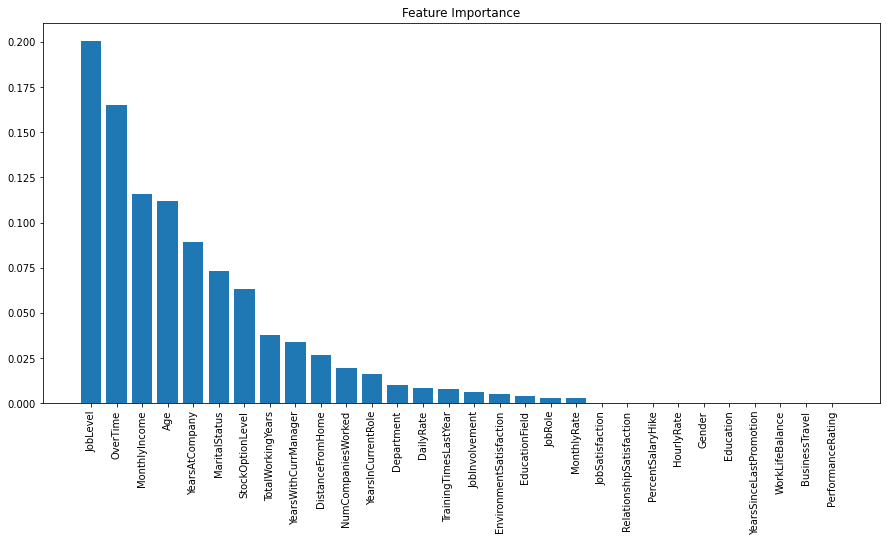

In [73]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices] # rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15,7))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]),importances[indices])
plt.xticks(range(X_train.shape[1]),names,rotation=90)
plt.show()

In [74]:
# how exactly these variables are running behind and helping us to know that it is important, 
# will learn in next concept called "model_explainability"
# black box technique will be used
# basically ensembles can also be called under black box technique